<a href="https://colab.research.google.com/github/Dimitri-Code56/network_analysis/blob/main/Ativ2_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install networkx

In [2]:
import networkx
import pandas as pd
#pd.set_option('max_rows', 400)
import matplotlib.pyplot as plt
from google.colab import files



In [3]:

uploaded = files.upload

In [4]:

# Faça o upload do arquivo
uploaded = files.upload()

# Pegue o nome do arquivo carregado
filename = list(uploaded.keys())[0]

# Leia o arquivo CSV como um DataFrame do pandas
Cyber_Attack = pd.read_csv(filename)

# Exiba as primeiras linhas do DataFrame
Cyber_Attack.head()


Saving Cyberattacks Detection.csv to Cyberattacks Detection.csv


<ipython-input-4-9067741cfbbc>:8: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  Cyber_Attack = pd.read_csv(filename)


,Attack ID,Source IP,Destination IP,Source Country,Destination Country,Protocol,Source Port,Destination Port,Attack Type,Payload Size (bytes),Detection Label,Confidence Score,ML Model,Affected System,Port Type,Timestamp
0,1.0,68.156.227.194,194.91.121.112,India,USA,ICMP,16824.0,53410.0,Brute Force,3936.0,Detected,0.600507,K-Nearest Neighbors,Cloud Storage,Other,NaN
1,2.0,249.221.229.41,3.207.120.235,Germany,USA,TCP,23977.0,31745.0,Advanced Persistent Threat (APT),2870.0,Detected,0.524150,K-Nearest Neighbors,Network Router,Other,NaN
2,4.0,154.55.209.171,132.115.33.82,USA,China,UDP,36556.0,38880.0,Cross-Site Scripting (XSS) Attack,3833.0,Not Detected,0.238944,Neural Network,Workstation,Other,NaN
3,5.0,106.61.204.27,40.61.49.130,France,France,UDP,14724.0,21669.0,Insider Threat,4301.0,Not Detected,0.122334,Neural Network,Workstation,Other,NaN
4,6.0,144.190.250.125,34.68.66.192,South Korea,Germany,TCP,44693.0,6474.0,Watering Hole Attack,4569.0,Detected,0.970895,Neural Network,Application Server,Other,NaN


In [5]:
G = networkx.from_pandas_edgelist(Cyber_Attack, 'Source Country', 'Affected System')

In [6]:
networkx.write_graphml(G, 'Cyber_Attack.graphml')

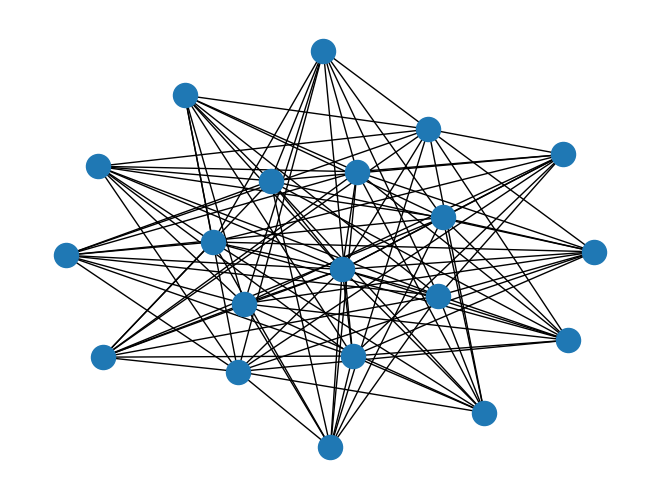

In [7]:
networkx.draw(G)

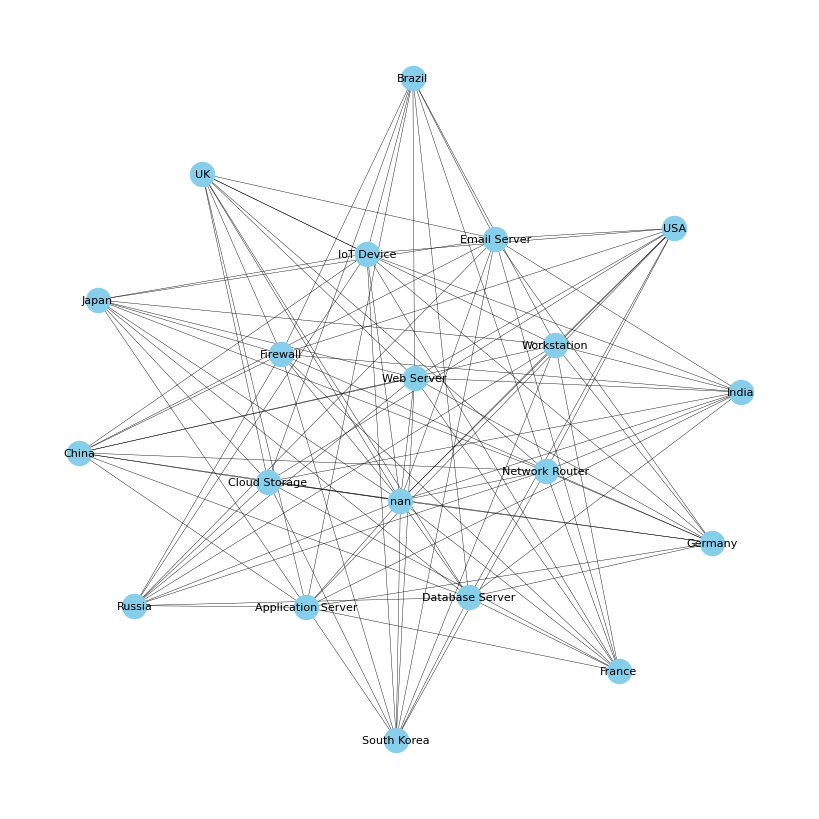

In [9]:
plt.figure(figsize=(8,8))
networkx.draw(G, with_labels=True, node_color='skyblue', width=.3, font_size=8)

In [10]:
networkx.degree(G)

DegreeView({'India': 10, 'Cloud Storage': 11, 'Germany': 10, 'Network Router': 11, 'USA': 10, 'Workstation': 11, 'France': 10, 'South Korea': 10, 'Application Server': 11, 'UK': 10, 'Web Server': 11, 'Database Server': 11, 'Japan': 10, 'Email Server': 11, 'Firewall': 11, 'IoT Device': 11, 'China': 10, 'Brazil': 9, 'Russia': 10, nan: 18})

In [11]:
degrees = dict(networkx.degree(G))
networkx.set_node_attributes(G, name='degree', values=degrees)

In [12]:
degree_df = pd.DataFrame(G.nodes(data='degree'), columns=['node', 'degree'])
degree_df = degree_df.sort_values(by='degree', ascending=False)
degree_df

,node,degree
19,NaN,18
8,Application Server,11
15,IoT Device,11
14,Firewall,11
13,Email Server,11
11,Database Server,11
1,Cloud Storage,11
10,Web Server,11
5,Workstation,11
3,Network Router,11


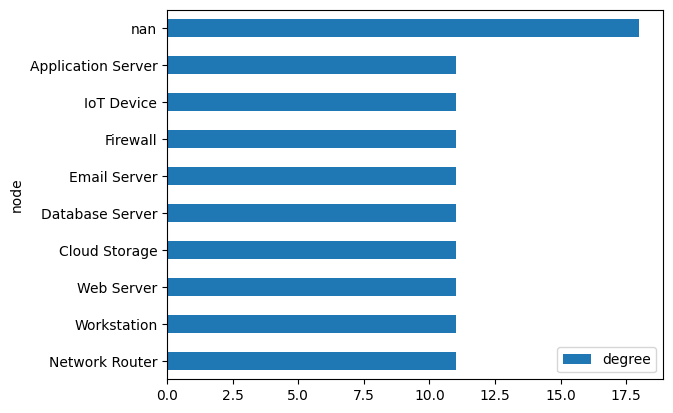

In [13]:
num_nodes_to_inspect = 10
degree_df[:num_nodes_to_inspect].plot(x='node', y='degree', kind='barh').invert_yaxis()

In [14]:
networkx.degree(G, weight='Weight')

DegreeView({'India': 10, 'Cloud Storage': 11, 'Germany': 10, 'Network Router': 11, 'USA': 10, 'Workstation': 11, 'France': 10, 'South Korea': 10, 'Application Server': 11, 'UK': 10, 'Web Server': 11, 'Database Server': 11, 'Japan': 10, 'Email Server': 11, 'Firewall': 11, 'IoT Device': 11, 'China': 10, 'Brazil': 9, 'Russia': 10, nan: 18})

In [15]:
weighted_degrees = dict(networkx.degree(G, weight='Weight'))
networkx.set_node_attributes(G, name='weighted_degree', values=weighted_degrees)

In [16]:
weighted_degree_df = pd.DataFrame(G.nodes(data='weighted_degree'), columns=['node', 'weighted_degree'])
weighted_degree_df = weighted_degree_df.sort_values(by='weighted_degree', ascending=False)
weighted_degree_df

,node,weighted_degree
19,NaN,18
8,Application Server,11
15,IoT Device,11
14,Firewall,11
13,Email Server,11
11,Database Server,11
1,Cloud Storage,11
10,Web Server,11
5,Workstation,11
3,Network Router,11


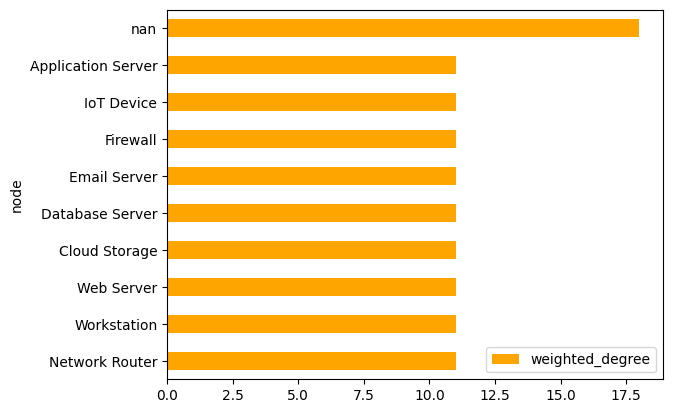

In [17]:
num_nodes_to_inspect = 10
weighted_degree_df[:num_nodes_to_inspect].plot(x='node', y='weighted_degree', color='orange', kind='barh').invert_yaxis()

In [18]:
networkx.betweenness_centrality(G)

{'India': 0.019138755980861247,
 'Cloud Storage': 0.027550357374918778,
 'Germany': 0.019138755980861247,
 'Network Router': 0.027550357374918778,
 'USA': 0.019138755980861247,
 'Workstation': 0.027550357374918778,
 'France': 0.019138755980861247,
 'South Korea': 0.019138755980861247,
 'Application Server': 0.027550357374918778,
 'UK': 0.019138755980861247,
 'Web Server': 0.027550357374918778,
 'Database Server': 0.027550357374918778,
 'Japan': 0.019138755980861247,
 'Email Server': 0.027550357374918778,
 'Firewall': 0.027550357374918778,
 'IoT Device': 0.027550357374918778,
 'China': 0.019138755980861247,
 'Brazil': 0.019138755980861247,
 'Russia': 0.019138755980861247,
 nan: 0.09574694311536415}

In [19]:
betweenness_centrality = networkx.betweenness_centrality(G)

In [20]:
networkx.set_node_attributes(G, name='betweenness', values=betweenness_centrality)

In [21]:
betweenness_df = pd.DataFrame(G.nodes(data='betweenness'), columns=['node', 'betweenness'])
betweenness_df = betweenness_df.sort_values(by='betweenness', ascending=False)
betweenness_df

,node,betweenness
19,NaN,0.095747
8,Application Server,0.027550
15,IoT Device,0.027550
14,Firewall,0.027550
13,Email Server,0.027550
11,Database Server,0.027550
1,Cloud Storage,0.027550
10,Web Server,0.027550
5,Workstation,0.027550
3,Network Router,0.027550


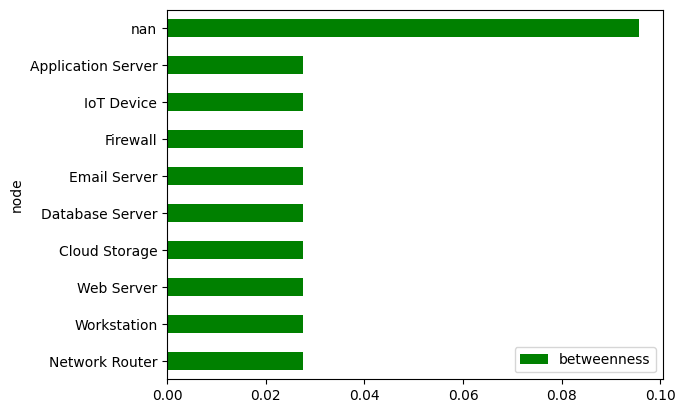

In [22]:
num_nodes_to_inspect = 10
betweenness_df[:num_nodes_to_inspect].plot(x='node', y='betweenness', color='green', kind='barh').invert_yaxis()

In [23]:
from networkx.algorithms import community

In [24]:
communities = community.greedy_modularity_communities(G)

TypeError: Consider using a tuple, with a priority value that can be compared.

In [25]:
# Create empty dictionary
modularity_class = {}
#Loop through each community in the network
for community_number, community in enumerate(communities):
    #For each member of the community, add their community number
    for name in community:
        modularity_class[name] = community_number

NameError: name 'communities' is not defined

##Não foi possivel fazer a parte de comunidades